In [270]:
import pandas as pd
import folium
import random

pd10 = pd.read_csv('충청북도 옥천군_경로당현황_좌표추가.csv')
pd20 = pd.read_csv('충청북도 옥천군_음식점현황_좌표추가.csv') 

In [271]:
pd10

,연번,읍면,경로당명,경로당 주소,Latitude,Longitude,데이터기준일
0,1,옥천읍,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.316840,127.581309,2022-06-15
1,2,옥천읍,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444,2022-06-15
2,3,옥천읍,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065,2022-06-15
3,4,옥천읍,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357,2022-06-15
4,5,옥천읍,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288,2022-06-15
...,...,...,...,...,...,...,...
304,305,군북면,안말(국원),충청북도 옥천군 군북면 국원3길 45-2,36.350943,127.585766,2022-06-15
305,306,군북면,소정,충청북도 옥천군 군북면 소정2길 1,36.355780,127.596461,2022-06-15
306,307,군북면,안말,충청북도 옥천군 군북면 성왕로 1900,36.361852,127.605075,2022-06-15
307,308,군북면,막지,충청북도 옥천군 군북면 답양막지길 404,36.374981,127.606851,2022-06-15


In [272]:
pd10 = pd10.rename(columns={"경로당명": "경로당명/음식점명"})
pd10 = pd10.rename(columns={"경로당 주소": "도로명 주소"})
pd10

,연번,읍면,경로당명/음식점명,도로명 주소,Latitude,Longitude,데이터기준일
0,1,옥천읍,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.316840,127.581309,2022-06-15
1,2,옥천읍,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444,2022-06-15
2,3,옥천읍,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065,2022-06-15
3,4,옥천읍,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357,2022-06-15
4,5,옥천읍,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288,2022-06-15
...,...,...,...,...,...,...,...
304,305,군북면,안말(국원),충청북도 옥천군 군북면 국원3길 45-2,36.350943,127.585766,2022-06-15
305,306,군북면,소정,충청북도 옥천군 군북면 소정2길 1,36.355780,127.596461,2022-06-15
306,307,군북면,안말,충청북도 옥천군 군북면 성왕로 1900,36.361852,127.605075,2022-06-15
307,308,군북면,막지,충청북도 옥천군 군북면 답양막지길 404,36.374981,127.606851,2022-06-15


In [273]:
pd10 = pd10.drop("연번", axis=1)
pd10 = pd10.drop("읍면",axis=1)
pd10 = pd10.drop("데이터기준일", axis=1)
pd10

,경로당명/음식점명,도로명 주소,Latitude,Longitude
0,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.316840,127.581309
1,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444
2,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065
3,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357
4,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288
...,...,...,...,...
304,안말(국원),충청북도 옥천군 군북면 국원3길 45-2,36.350943,127.585766
305,소정,충청북도 옥천군 군북면 소정2길 1,36.355780,127.596461
306,안말,충청북도 옥천군 군북면 성왕로 1900,36.361852,127.605075
307,막지,충청북도 옥천군 군북면 답양막지길 404,36.374981,127.606851


In [274]:
pd20 = pd20.rename(columns={"업소명": "경로당명/음식점명"})
pd20 = pd20.rename(columns={"소재지(도로명)": "도로명 주소"})
pd20 = pd20[1:].dropna()
pd20

,연번,업종명,군분,경로당명/음식점명,도로명 주소,Latitude,Longitude,소재지(지번),소재지전화,데이터기준일
1,1.0,일반음식점,한식,중앙집,충청북도 옥천군 군서면 동평4길 4,36.2724864,127.5271976,충청북도 옥천군 군서면 동평리 428-9,043- 732-4009,2022-09-20
2,2.0,일반음식점,한식,선광집,충청북도 옥천군 청산면 지전2길 14,36.3461465,127.7893715,충청북도 옥천군 청산면 지전리 162-8,043 -732 -8404,2022-09-20
3,3.0,일반음식점,한식,별미올갱이,충청북도 옥천군 옥천읍 삼금로2길 3-1,36.300024,127.5662842,충청북도 옥천군 옥천읍 금구리 191-41,043- 731-4423,2022-09-20
5,5.0,일반음식점,식육(숯불구이),한양식당,충청북도 옥천군 군서면 동평1길 7-3,36.2781755,127.5282883,충청북도 옥천군 군서면 동평리 491-4,043 -732 -4005,2022-09-20
6,6.0,일반음식점,한식,금강집,충청북도 옥천군 청산면 지전1길 23,36.3458569,127.7920893,충청북도 옥천군 청산면 지전리 75-2,043 -732 -8083,2022-09-20
...,...,...,...,...,...,...,...,...,...,...
908,908.0,휴게음식점,커피숍,하이(Hi) 커피,"충청북도 옥천군 옥천읍 장야3길 19-6, 경은빌 101호",36.2963194,127.5788433,충청북도 옥천군 옥천읍 장야리 306-26 경은빌,043 -733 -1495,2022-09-20
909,909.0,휴게음식점,기타 휴게음식점,공차 충북옥천점,"충청북도 옥천군 옥천읍 금장로 51, 소매업",36.3009393,127.5697639,충청북도 옥천군 옥천읍 금구리 18-25 소매업,043 -731 -4413,2022-09-20
915,915.0,휴게음식점,편의점,금강낚시 마마트,"충청북도 옥천군 옥천읍 옥천로 1608-1, 상점",36.299509,127.5651241,충청북도 옥천군 옥천읍 금구리 112-5 상점,043 -731 -7778,2022-09-20
918,918.0,휴게음식점,커피숍,할리스충북옥천점,충청북도 옥천군 옥천읍 송신길 172,36.2915097,127.5796777,충청북도 옥천군 옥천읍 서대리 13-1,043 -731 -5560,2022-09-20


In [275]:
pd20 = pd20.drop("연번", axis=1)
pd20 = pd20.drop("업종명", axis=1)
pd20 = pd20.drop("군분", axis=1)
pd20 = pd20.drop("소재지(지번)",axis=1)
pd20 = pd20.drop("소재지전화", axis=1)
pd20 = pd20.drop("데이터기준일", axis=1)
pd20 = pd20[:-1]
pd20

,경로당명/음식점명,도로명 주소,Latitude,Longitude
1,중앙집,충청북도 옥천군 군서면 동평4길 4,36.2724864,127.5271976
2,선광집,충청북도 옥천군 청산면 지전2길 14,36.3461465,127.7893715
3,별미올갱이,충청북도 옥천군 옥천읍 삼금로2길 3-1,36.300024,127.5662842
5,한양식당,충청북도 옥천군 군서면 동평1길 7-3,36.2781755,127.5282883
6,금강집,충청북도 옥천군 청산면 지전1길 23,36.3458569,127.7920893
...,...,...,...,...
906,1989역전 꼬마김밥 옥천점,"충청북도 옥천군 옥천읍 금장로 35, 상점",36.3016578,127.5681888
908,하이(Hi) 커피,"충청북도 옥천군 옥천읍 장야3길 19-6, 경은빌 101호",36.2963194,127.5788433
909,공차 충북옥천점,"충청북도 옥천군 옥천읍 금장로 51, 소매업",36.3009393,127.5697639
915,금강낚시 마마트,"충청북도 옥천군 옥천읍 옥천로 1608-1, 상점",36.299509,127.5651241


In [276]:
def merge_dataframes(pd10, pd20):
    # 두 데이터프레임을 합침
    merged_df = pd.concat([pd10, pd20], ignore_index=True)
    return merged_df

merged_df = merge_dataframes(pd10, pd20)
merged_df

,경로당명/음식점명,도로명 주소,Latitude,Longitude
0,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.31684,127.581309
1,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444
2,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065
3,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357
4,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288
...,...,...,...,...
962,1989역전 꼬마김밥 옥천점,"충청북도 옥천군 옥천읍 금장로 35, 상점",36.3016578,127.5681888
963,하이(Hi) 커피,"충청북도 옥천군 옥천읍 장야3길 19-6, 경은빌 101호",36.2963194,127.5788433
964,공차 충북옥천점,"충청북도 옥천군 옥천읍 금장로 51, 소매업",36.3009393,127.5697639
965,금강낚시 마마트,"충청북도 옥천군 옥천읍 옥천로 1608-1, 상점",36.299509,127.5651241


In [59]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "청성면"이 포함된 행을 뽑음
merged_df_청성면 = merged_df[merged_df["도로명 주소"].str.contains("청성면")]

# 필터링된 데이터프레임 출력
print(merged_df_청성면)

merged_df_청성면.shape[0]

    경로당명/음식점명                    도로명 주소    Latitude    Longitude
152       산계1       충청북도 옥천군 청성면 산계길 42   36.326509    127.75988
153       산계2       충청북도 옥천군 청성면 산계길 81   36.329771   127.759482
154       산계3     충청북도 옥천군 청성면 산계2길 102   36.326332   127.751453
155        거포       충청북도 옥천군 청성면 거포3길 8   36.331178   127.737249
156        상포      충청북도 옥천군 청성면 거포2길 17   36.333988   127.739122
157        만명     충청북도 옥천군 청성면 장수로1길 44   36.314311   127.745618
158        무회   충청북도 옥천군 청성면 장수로2길 36-1   36.306055   127.735433
159        점동    충청북도 옥천군 청성면 장수로 552-3   36.323139    127.72443
160        궁촌     충청북도 옥천군 청성면 궁촌길 19-2   36.308841   127.757607
161        서평       충청북도 옥천군 청성면 소서길 34   36.315823   127.771553
162        소서      충청북도 옥천군 청성면 소서길 243   36.300902   127.774968
163        삼남      충청북도 옥천군 청성면 삼남1길 23   36.296036   127.753983
164       삼거리    충청북도 옥천군 청성면 삼남2길 90-1   36.286519   127.741908
165        조천      충청북도 옥천군 청성면 조천길 213   36.283159   127.757789
166        묘동     충청북도 옥천

47

In [60]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "청산면"이 포함된 행을 뽑음
merged_df_청산면 = merged_df[merged_df["도로명 주소"].str.contains("청산면")]

# 필터링된 데이터프레임 출력
print(merged_df_청산면)

merged_df_청산면.shape[0]

    경로당명/음식점명                      도로명 주소    Latitude    Longitude
191        백운       충청북도 옥천군 청산면 백운길 20-7   36.349032    127.79315
192        분회      충청북도 옥천군 청산면 지전길 32-13   36.345481   127.793974
193        지전        충청북도 옥천군 청산면 지전2길 27   36.346786   127.790584
194      지전여자        충청북도 옥천군 청산면 지전2길 27   36.346786   127.790584
195        교평         충청북도 옥천군 청산면 교평길 26   36.345055   127.797313
..        ...                         ...         ...          ...
905     사랑방다방      충청북도 옥천군 청산면 지전길 36-11  36.3455603  127.7931364
906      로얄다방         충청북도 옥천군 청산면 지전길 21  36.3444621  127.7942283
907      폭포다방         충청북도 옥천군 청산면 지전1길 3  36.3442022  127.7924776
928      시장다방      충청북도 옥천군 청산면 지전길 49-12  36.3450536   127.791754
958      청산이레  충청북도 옥천군 청산면 지전길 35, 청산농약사  36.3451648  127.7932741

[79 rows x 4 columns]


79

In [61]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "동이면"이 포함된 행을 뽑음
merged_df_동이면 = merged_df[merged_df["도로명 주소"].str.contains("동이면")]

# 필터링된 데이터프레임 출력
print(merged_df_동이면)

merged_df_동이면.shape[0]

          경로당명/음식점명                       도로명 주소    Latitude    Longitude
74               상촌         충청북도 옥천군 동이면 평산2길 28    36.28493   127.614256
75               평촌          충청북도 옥천군 동이면 평산길 41   36.283151   127.616616
76               소도       충청북도 옥천군 동이면 평산1길 31-1   36.288463   127.617609
77               용운          충청북도 옥천군 동이면 세산2길 6   36.271285   127.604855
78               용암         충청북도 옥천군 동이면 세산2길 74   36.265706    127.60576
..              ...                          ...         ...          ...
863            중해식당        충청북도 옥천군 동이면 금강로 17-8   36.294904  127.6160021
912      금강휴게소 롯데리아  충청북도 옥천군 동이면 금강로 596 (외6필지)  36.2789444  127.6720992
913    (주)금강휴게소(4호)  충청북도 옥천군 동이면 금강로 596 (외6필지)  36.2789444  127.6720992
914    (주)금강휴게소(5호)  충청북도 옥천군 동이면 금강로 596 (외6필지)  36.2789444  127.6720992
930  (주)금강휴게소(하행4호)         충청북도 옥천군 동이면 금강로 596  36.2789444  127.6720992

[69 rows x 4 columns]


69

In [62]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "군북면"이 포함된 행을 뽑음
merged_df_군북면 = merged_df[merged_df["도로명 주소"].str.contains("군북면")]

# 필터링된 데이터프레임 출력
print(merged_df_군북면)

merged_df_군북면.shape[0]

     경로당명/음식점명                         도로명 주소    Latitude    Longitude
280        이백1          충청북도 옥천군 군북면 이백3길15-7    36.33009   127.531993
281        이백2         충청북도 옥천군 군북면 이백1길 3-18   36.328975   127.536487
282         자모         충청북도 옥천군 군북면 자모2길 20-1   36.330033   127.513362
283       윗자모리         충청북도 옥천군 군북면 자모길 186-1   36.323897   127.509559
284         증약         충청북도 옥천군 군북면 증약1길 10-7   36.338679   127.516158
..         ...                            ...         ...          ...
869       오네마루       충청북도 옥천군 군북면 성왕로 1873-14  36.3613018  127.6031586
872         국빈  충청북도 옥천군 군북면 비야대정로 282-15, 주택   36.352709  127.5259459
924     태극기사식당           충청북도 옥천군 군북면 옥천로 937  36.3362874  127.5168733
927  산들바람찐빵손만두        충청북도 옥천군 군북면 옥천로 1116-3  36.3305756  127.5344249
959      카페대장간       충청북도 옥천군 군북면 비야대정로 176-9  36.3440326  127.5262923

[82 rows x 4 columns]


82

In [63]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "군서면"이 포함된 행을 뽑음
merged_df_군서면 = merged_df[merged_df["도로명 주소"].str.contains("군서면")]

# 필터링된 데이터프레임 출력
print(merged_df_군서면)

merged_df_군서면.shape[0]

    경로당명/음식점명                         도로명 주소    Latitude    Longitude
259        동산            충청북도 옥천군 군서면 동평1길 7   36.278018   127.528592
260      동산여자           충청북도 옥천군 군서면 동평1길 20   36.278807   127.529455
261        평곡          충청북도 옥천군 군서면 동평4길 9-8   36.273008   127.527831
262        증산         충청북도 옥천군 군서면 금산1길 20-3   36.268873    127.53389
263        금천           충청북도 옥천군 군서면 금산3길 23   36.250688   127.546922
264        사정            충청북도 옥천군 군서면 사정4길 3   36.261041   127.520473
265        향정         충청북도 옥천군 군서면 사정1길 18-5   36.266456   127.525239
266        상지          충청북도 옥천군 군서면 상지1길 8-4   36.254064   127.512072
267        은행         충청북도 옥천군 군서면 은행1길 23-6   36.270182    127.51667
268        상은           충청북도 옥천군 군서면 은행3길 45   36.264786   127.516104
269        사양            충청북도 옥천군 군서면 사양2길 4   36.274107   127.500121
270        상중            충청북도 옥천군 군서면 상중길 92   36.288433   127.518328
271        신대           충청북도 옥천군 군서면 상중1길 17   36.286622    127.52272
272        하동       

46

In [64]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "안남면"이 포함된 행을 뽑음
merged_df_안남면 = merged_df[merged_df["도로명 주소"].str.contains("안남면")]

# 필터링된 데이터프레임 출력
print(merged_df_안남면)

merged_df_안남면.shape[0]

    경로당명/음식점명                   도로명 주소    Latitude    Longitude
106        연주      충청북도 옥천군 안남면 연주2길 9   36.356816   127.674667
107       독락정     충청북도 옥천군 안남면 연주길 150   36.348656   127.667064
108        중촌      충청북도 옥천군 안남면 연주길 70   36.354234   127.672167
109        미산    충청북도 옥천군 안남면 종미3길 106   36.340797   127.670281
110        종배     충청북도 옥천군 안남면 종미1길 41   36.344524   127.674169
111        진벌  충청북도 옥천군 안남면 지수1길 212-1    36.34122   127.683862
112        모산      충청북도 옥천군 안남면 지수2길 6   36.346007   127.689493
113   지수2(수동)     충청북도 옥천군 안남면 안남로 919   36.323404   127.683358
114   잔다리(세교)     충청북도 옥천군 안남면 지수3길 26   36.333318    127.68431
115       서당골     충청북도 옥천군 안남면 도덕2길 64   36.354095   127.682641
116       하서당   충청북도 옥천군 안남면 도덕2길 15-3    36.35406   127.677815
117        도근    충청북도 옥천군 안남면 도덕3길 1-2   36.359542   127.686737
118        덕실     충청북도 옥천군 안남면 도덕1길 85   36.351762   127.684963
119        심청   충청북도 옥천군 안남면 청정1길 27-7   36.364354   127.676688
120        청정      충청북도 옥천군 안남면 청정2길 3  

31

In [65]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "안내면"이 포함된 행을 뽑음
merged_df_안내면 = merged_df[merged_df["도로명 주소"].str.contains("안내면")]

# 필터링된 데이터프레임 출력
print(merged_df_안내면)

merged_df_안내면.shape[0]

    경로당명/음식점명                       도로명 주소    Latitude    Longitude
129        현1          충청북도 옥천군 안내면 현리길 84   36.394071   127.659849
130       현리2         충청북도 옥천군 안내면 현리5길 15   36.393219   127.648757
131        신촌         충청북도 옥천군 안내면 현리길 131   36.391718   127.655495
132        정곡          충청북도 옥천군 안내면 정방2길 8   36.397312   127.669833
133        방곡         충청북도 옥천군 안내면 정방1길 21   36.393541   127.671764
134        도이          충청북도 옥천군 안내면 도이길 75   36.403573   127.674846
135        동대       충청북도 옥천군 안내면 동대1길 15-2   36.408708   127.669897
136        북대       충청북도 옥천군 안내면 동대5길 39-1     36.4137   127.667821
137       새터말         충청북도 옥천군 안내면 동대4길 19   36.412229   127.671632
138        뱀골         충청북도 옥천군 안내면 서대1길 22   36.408986   127.661627
139        서대         충청북도 옥천군 안내면 방하목로 79   36.411697   127.663806
140       오덕1       충청북도 옥천군 안내면 오덕2길 18-1    36.39251   127.717361
141       오덕2       충청북도 옥천군 안내면 오덕1길 27-4   36.396102   127.695971
142        화인         충청북도 옥천군 안내면 인포1길 11   36.

43

In [66]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "이원면"이 포함된 행을 뽑음
merged_df_이원면 = merged_df[merged_df["도로명 주소"].str.contains("이원면")]

# 필터링된 데이터프레임 출력
print(merged_df_이원면)

merged_df_이원면.shape[0]

       경로당명/음식점명                    도로명 주소    Latitude    Longitude
225          건진1      충청북도 옥천군 이원면 건진1길 26   36.253751   127.614844
226          건진2      충청북도 옥천군 이원면 건진3길 83   36.248817   127.608167
227           장찬   충청북도 옥천군 이원면 장찬길 376-18   36.245906   127.581417
228          강청1     충청북도 옥천군 이원면 강청4길 7-4   36.241021    127.61073
229          강청2       충청북도 옥천군 이원면 강청길 53   36.244018   127.612999
..           ...                       ...         ...          ...
870      해바라기 카페       충청북도 옥천군 이원면 강청길 30  36.2460517  127.6146207
925         쿠키렐레      충청북도 옥천군 이원면 묘목로 112  36.2475401  127.6209666
944      씨유옥천이원점  충청북도 옥천군 이원면 묘목로 101, 상점  36.2474841  127.6222465
950  지에스25 옥천이원점      충청북도 옥천군 이원면 묘목로 139  36.2474605  127.6179339
960         만나김밥    충청북도 옥천군 이원면 신흥길 8, 상점   36.245933  127.6206424

[74 rows x 4 columns]


74

In [67]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "옥천읍"이 포함된 행을 뽑음
merged_df_옥천읍 = merged_df[merged_df["도로명 주소"].str.contains("옥천읍")]

# 필터링된 데이터프레임 출력
print(merged_df_옥천읍)

merged_df_옥천읍.shape[0]

           경로당명/음식점명                            도로명 주소    Latitude  \
0                죽향1           충청북도 옥천군 옥천읍 향수2길 46-11    36.31684   
1                죽향2        충청북도 옥천군 옥천읍 성왕로 1274, 옥향@   36.317056   
2                죽향3  충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101   36.316055   
3                문정1               충청북도 옥천군 옥천읍 향수2길 9   36.313722   
4                문정2           충청북도 옥천군 옥천읍 문정2길 13-15   36.305198   
..               ...                               ...         ...   
961  1989역전 꼬마김밥 옥천점           충청북도 옥천군 옥천읍 금장로 35, 상점  36.3016578   
962        하이(Hi) 커피  충청북도 옥천군 옥천읍 장야3길 19-6, 경은빌 101호  36.2963194   
963         공차 충북옥천점          충청북도 옥천군 옥천읍 금장로 51, 소매업  36.3009393   
964         금강낚시 마마트       충청북도 옥천군 옥천읍 옥천로 1608-1, 상점   36.299509   
965         할리스충북옥천점              충청북도 옥천군 옥천읍 송신길 172  36.2915097   

       Longitude  
0     127.581309  
1     127.578444  
2     127.578065  
3     127.579357  
4     127.573288  
..           ...  
961  127.5681888  
962  12

495

In [68]:
import random
import pandas as pd

random.seed(123)

# merged_df_옥천읍 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_옥천읍["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_옥천읍["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x1_list = []
y1_list = []

for i in range(5330):
    x1_list.append(random.uniform(min_latitude, max_latitude))
    y1_list.append(random.uniform(min_longitude, max_longitude))

target1 = pd.DataFrame({'Latitude': x1_list, 'Longitude': y1_list})
target1

,Latitude,Longitude
0,36.328474,127.578041
1,36.283844,127.574590
2,36.270682,127.610055
3,36.310110,127.558240
4,36.299199,127.568773
...,...,...
5325,36.309360,127.560413
5326,36.263689,127.549087
5327,36.288494,127.565540
5328,36.280712,127.579756


In [69]:
import random
import pandas as pd

# merged_df_이원면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_이원면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_이원면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x2_list = []
y2_list = []

for i in range(1613):
    x2_list.append(random.uniform(min_latitude, max_latitude))
    y2_list.append(random.uniform(min_longitude, max_longitude))

target2 = pd.DataFrame({'Latitude': x2_list, 'Longitude': y2_list})
target2

,Latitude,Longitude
0,36.199589,127.620644
1,36.204749,127.680776
2,36.223399,127.627930
3,36.192611,127.683551
4,36.256214,127.665761
...,...,...
1608,36.224391,127.614476
1609,36.247001,127.587607
1610,36.255927,127.646526
1611,36.203703,127.677568


In [70]:
import random
import pandas as pd

# merged_df_안내면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_안내면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_안내면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x3_list = []
y3_list = []

for i in range(852):
    x3_list.append(random.uniform(min_latitude, max_latitude))
    y3_list.append(random.uniform(min_longitude, max_longitude))

target3 = pd.DataFrame({'Latitude': x3_list, 'Longitude': y3_list})
target3

,Latitude,Longitude
0,36.373118,127.654660
1,36.427969,127.688251
2,36.365869,127.630183
3,36.390613,127.701493
4,36.373311,127.675259
...,...,...
847,36.433122,127.650165
848,36.395815,127.611044
849,36.374032,127.667179
850,36.420506,127.687909


In [71]:
import random
import pandas as pd

# merged_df_안남면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_안남면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_안남면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x4_list = []
y4_list = []

for i in range(573):
    x4_list.append(random.uniform(min_latitude, max_latitude))
    y4_list.append(random.uniform(min_longitude, max_longitude))

target4 = pd.DataFrame({'Latitude': x4_list, 'Longitude': y4_list})
target4

,Latitude,Longitude
0,36.323707,127.668972
1,36.353585,127.690475
2,36.328924,127.671089
3,36.333223,127.691544
4,36.365553,127.695316
...,...,...
568,36.370455,127.667225
569,36.368183,127.700159
570,36.345382,127.682215
571,36.363851,127.683679


In [72]:
import random
import pandas as pd

# merged_df_군서면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_군서면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_군서면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x5_list = []
y5_list = []

for i in range(895):
    x5_list.append(random.uniform(min_latitude, max_latitude))
    y5_list.append(random.uniform(min_longitude, max_longitude))

target5 = pd.DataFrame({'Latitude': x5_list, 'Longitude': y5_list})
target5

,Latitude,Longitude
0,36.289182,127.519609
1,36.277403,127.529300
2,36.253470,127.551264
3,36.278705,127.544101
4,36.301178,127.548060
...,...,...
890,36.264567,127.522236
891,36.286216,127.517193
892,36.274719,127.512335
893,36.271670,127.549655


In [73]:
import random
import pandas as pd

# merged_df_군북면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_군북면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_군북면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x6_list = []
y6_list = []

for i in range(1029):
    x6_list.append(random.uniform(min_latitude, max_latitude))
    y6_list.append(random.uniform(min_longitude, max_longitude))

target6 = pd.DataFrame({'Latitude': x6_list, 'Longitude': y6_list})
target6

,Latitude,Longitude
0,36.352130,127.538695
1,36.327456,127.517640
2,36.363362,127.563768
3,36.324908,127.519053
4,36.374849,127.520865
...,...,...
1024,36.367522,127.548177
1025,36.386697,127.547579
1026,36.326222,127.584224
1027,36.364310,127.564552


In [74]:
import random
import pandas as pd

# merged_df_동이면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_동이면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_동이면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x7_list = []
y7_list = []

for i in range(1122):
    x7_list.append(random.uniform(min_latitude, max_latitude))
    y7_list.append(random.uniform(min_longitude, max_longitude))

target7 = pd.DataFrame({'Latitude': x7_list, 'Longitude': y7_list})
target7

,Latitude,Longitude
0,36.268556,127.615555
1,36.300699,127.649834
2,36.305817,127.689133
3,36.297944,127.687054
4,36.297861,127.635668
...,...,...
1117,36.313430,127.632526
1118,36.284908,127.638039
1119,36.297787,127.667086
1120,36.279948,127.668168


In [75]:
import random
import pandas as pd

# merged_df_청산면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_청산면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_청산면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x8_list = []
y8_list = []

for i in range(1325):
    x8_list.append(random.uniform(min_latitude, max_latitude))
    y8_list.append(random.uniform(min_longitude, max_longitude))

target8 = pd.DataFrame({'Latitude': x8_list, 'Longitude': y8_list})
target8

,Latitude,Longitude
0,36.327830,127.847278
1,36.351639,127.786766
2,36.370845,127.791568
3,36.302233,127.848756
4,36.347581,127.805988
...,...,...
1320,36.325955,127.771770
1321,36.323735,127.835376
1322,36.376026,127.825440
1323,36.351223,127.858199


In [76]:
import random
import pandas as pd

# merged_df_청성면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_청성면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_청성면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x9_list = []
y9_list = []

for i in range(1110):
    x9_list.append(random.uniform(min_latitude, max_latitude))
    y9_list.append(random.uniform(min_longitude, max_longitude))

target9 = pd.DataFrame({'Latitude': x9_list, 'Longitude': y9_list})
target9

,Latitude,Longitude
0,36.356873,127.685415
1,36.335030,127.755561
2,36.375577,127.722494
3,36.302468,127.743716
4,36.345254,127.683878
...,...,...
1105,36.314941,127.751709
1106,36.358581,127.675583
1107,36.306681,127.674932
1108,36.367780,127.674297


In [77]:
#target1~9

map_center1 = [target1["Latitude"].mean(), target1["Longitude"].mean()]  # 중앙 좌표 설정

map = folium.Map(location=map_center1, zoom_start=10)  # 중앙 좌표 기준으로 지도 생성

# 랜덤 좌표들을 지도에 마커로 추가
# target1
for lat, lng in zip(target1.Latitude, target1.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='blue',
                        fill=True,
                        fill_color='skyblue',
                        fill_opacity = 0.5
                       ).add_to(map)
# target2
for lat, lng in zip(target2.Latitude, target2.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='red',
                        fill=True,
                        fill_color='pink',
                        fill_opacity = 0.5
                       ).add_to(map)
# target3
for lat, lng in zip(target3.Latitude, target3.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='green',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)
# target4
for lat, lng in zip(target4.Latitude, target4.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='white',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.2
                       ).add_to(map)

# target5
for lat, lng in zip(target5.Latitude, target5.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='black',
                        fill=True,
                        fill_color='skyblue',
                        fill_opacity = 0.2
                       ).add_to(map)
# target6
for lat, lng in zip(target6.Latitude, target6.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='yellow',
                        fill=True,
                        fill_color='pink',
                        fill_opacity = 0.5
                       ).add_to(map)
# target7
for lat, lng in zip(target7.Latitude, target7.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='skyblue',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)
    
# target8
for lat, lng in zip(target8.Latitude, target8.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='violet',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)
    
# target9
for lat, lng in zip(target9.Latitude, target9.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='coral',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
# map.save('./oc_randnum1_9.html')

In [78]:
# 읍면 난수 데이터 병합
ndf = pd.concat([target1, target2, target3, target4, target5, target6, target7, target8, target9])

ndf.describe()

,Latitude,Longitude
count,13849.000000,13849.000000
mean,36.305446,127.631023
std,0.048286,0.082518
min,36.188328,127.499837
25%,36.274601,127.572169
50%,36.303638,127.605895
75%,36.333498,127.676699
max,36.433164,127.861551


## 기존데이터(경로당+음식점) + 난수 데이터 프레임 병합

In [79]:
merged_df_옥천읍_target1 = pd.concat([target1, merged_df_옥천읍], ignore_index=True)

# 'Latitude'와 'Longitude' 열의 데이터 유형을 숫자(float)로 변환
merged_df_옥천읍_target1["Latitude"] = merged_df_옥천읍_target1["Latitude"].astype(float)
merged_df_옥천읍_target1["Longitude"] = merged_df_옥천읍_target1["Longitude"].astype(float)

merged_df_옥천읍_target1=merged_df_옥천읍_target1.drop(['경로당명/음식점명','도로명 주소'], axis=1)
merged_df_옥천읍_target1

,Latitude,Longitude
0,36.328474,127.578041
1,36.283844,127.574590
2,36.270682,127.610055
3,36.310110,127.558240
4,36.299199,127.568773
...,...,...
5820,36.301658,127.568189
5821,36.296319,127.578843
5822,36.300939,127.569764
5823,36.299509,127.565124


In [80]:
merged_df_이원면_target2 = pd.concat([target2, merged_df_이원면], ignore_index=True)

# 'Latitude'와 'Longitude' 열의 데이터 유형을 숫자(float)로 변환
merged_df_이원면_target2["Latitude"] = merged_df_이원면_target2["Latitude"].astype(float)
merged_df_이원면_target2["Longitude"] = merged_df_이원면_target2["Longitude"].astype(float)

merged_df_이원면_target2=merged_df_이원면_target2.drop(['경로당명/음식점명','도로명 주소'], axis=1)
merged_df_이원면_target2

,Latitude,Longitude
0,36.199589,127.620644
1,36.204749,127.680776
2,36.223399,127.627930
3,36.192611,127.683551
4,36.256214,127.665761
...,...,...
1682,36.246052,127.614621
1683,36.247540,127.620967
1684,36.247484,127.622247
1685,36.247461,127.617934


In [81]:
merged_df_안내면_target3 = pd.concat([target3, merged_df_안내면], ignore_index=True)

# 'Latitude'와 'Longitude' 열의 데이터 유형을 숫자(float)로 변환
merged_df_안내면_target3["Latitude"] = merged_df_안내면_target3["Latitude"].astype(float)
merged_df_안내면_target3["Longitude"] = merged_df_안내면_target3["Longitude"].astype(float)

merged_df_안내면_target3=merged_df_안내면_target3.drop(['경로당명/음식점명','도로명 주소'], axis=1)
merged_df_안내면_target3

,Latitude,Longitude
0,36.373118,127.654660
1,36.427969,127.688251
2,36.365869,127.630183
3,36.390613,127.701493
4,36.373311,127.675259
...,...,...
890,36.393676,127.659385
891,36.372373,127.633033
892,36.372520,127.633520
893,36.394971,127.668600


In [82]:
merged_df_안남면_target4 = pd.concat([target4, merged_df_안남면], ignore_index=True)

# 'Latitude'와 'Longitude' 열의 데이터 유형을 숫자(float)로 변환
merged_df_안남면_target4["Latitude"] = merged_df_안남면_target4["Latitude"].astype(float)
merged_df_안남면_target4["Longitude"] = merged_df_안남면_target4["Longitude"].astype(float)

merged_df_안남면_target4=merged_df_안남면_target4.drop(['경로당명/음식점명','도로명 주소'], axis=1)
merged_df_안남면_target4

,Latitude,Longitude
0,36.323707,127.668972
1,36.353585,127.690475
2,36.328924,127.671089
3,36.333223,127.691544
4,36.365553,127.695316
...,...,...
599,36.338390,127.678871
600,36.357853,127.674948
601,36.357041,127.673744
602,36.355751,127.672777


In [83]:
merged_df_군서면_target5 = pd.concat([target5, merged_df_군서면], ignore_index=True)

# 'Latitude'와 'Longitude' 열의 데이터 유형을 숫자(float)로 변환
merged_df_군서면_target5["Latitude"] = merged_df_군서면_target5["Latitude"].astype(float)
merged_df_군서면_target5["Longitude"] = merged_df_군서면_target5["Longitude"].astype(float)

merged_df_군서면_target5=merged_df_군서면_target5.drop(['경로당명/음식점명','도로명 주소'], axis=1)
merged_df_군서면_target5

,Latitude,Longitude
0,36.289182,127.519609
1,36.277403,127.529300
2,36.253470,127.551264
3,36.278705,127.544101
4,36.301178,127.548060
...,...,...
936,36.247218,127.553401
937,36.247873,127.552503
938,36.258596,127.548244
939,36.272471,127.526570


In [84]:
merged_df_군북면_target6 = pd.concat([target6, merged_df_군북면], ignore_index=True)

# 'Latitude'와 'Longitude' 열의 데이터 유형을 숫자(float)로 변환
merged_df_군북면_target6["Latitude"] = merged_df_군북면_target6["Latitude"].astype(float)
merged_df_군북면_target6["Longitude"] = merged_df_군북면_target6["Longitude"].astype(float)

merged_df_군북면_target6=merged_df_군북면_target6.drop(['경로당명/음식점명','도로명 주소'], axis=1)
merged_df_군북면_target6

,Latitude,Longitude
0,36.352130,127.538695
1,36.327456,127.517640
2,36.363362,127.563768
3,36.324908,127.519053
4,36.374849,127.520865
...,...,...
1106,36.361302,127.603159
1107,36.352709,127.525946
1108,36.336287,127.516873
1109,36.330576,127.534425


In [85]:
merged_df_동이면_target7 = pd.concat([target7, merged_df_동이면], ignore_index=True)

# 'Latitude'와 'Longitude' 열의 데이터 유형을 숫자(float)로 변환
merged_df_동이면_target7["Latitude"] = merged_df_동이면_target7["Latitude"].astype(float)
merged_df_동이면_target7["Longitude"] = merged_df_동이면_target7["Longitude"].astype(float)

merged_df_동이면_target7=merged_df_동이면_target7.drop(['경로당명/음식점명','도로명 주소'], axis=1)
merged_df_동이면_target7

,Latitude,Longitude
0,36.268556,127.615555
1,36.300699,127.649834
2,36.305817,127.689133
3,36.297944,127.687054
4,36.297861,127.635668
...,...,...
1186,36.294904,127.616002
1187,36.278944,127.672099
1188,36.278944,127.672099
1189,36.278944,127.672099


In [86]:
merged_df_청산면_target8 = pd.concat([target8, merged_df_청산면], ignore_index=True)

# 'Latitude'와 'Longitude' 열의 데이터 유형을 숫자(float)로 변환
merged_df_청산면_target8["Latitude"] = merged_df_청산면_target8["Latitude"].astype(float)
merged_df_청산면_target8["Longitude"] = merged_df_청산면_target8["Longitude"].astype(float)

merged_df_청산면_target8=merged_df_청산면_target8.drop(['경로당명/음식점명','도로명 주소'], axis=1)
merged_df_청산면_target8

,Latitude,Longitude
0,36.327830,127.847278
1,36.351639,127.786766
2,36.370845,127.791568
3,36.302233,127.848756
4,36.347581,127.805988
...,...,...
1399,36.345560,127.793136
1400,36.344462,127.794228
1401,36.344202,127.792478
1402,36.345054,127.791754


In [87]:
merged_df_청성면_target9 = pd.concat([target9, merged_df_청성면], ignore_index=True)

# 'Latitude'와 'Longitude' 열의 데이터 유형을 숫자(float)로 변환
merged_df_청성면_target9["Latitude"] = merged_df_청성면_target9["Latitude"].astype(float)
merged_df_청성면_target9["Longitude"] = merged_df_청성면_target9["Longitude"].astype(float)

merged_df_청성면_target9=merged_df_청성면_target9.drop(['경로당명/음식점명','도로명 주소'], axis=1)
merged_df_청성면_target9

,Latitude,Longitude
0,36.356873,127.685415
1,36.335030,127.755561
2,36.375577,127.722494
3,36.302468,127.743716
4,36.345254,127.683878
...,...,...
1152,36.294763,127.695066
1153,36.389574,127.734205
1154,36.330284,127.760096
1155,36.292001,127.696683


# GNN
전체 한번에 clustering 했을 때

In [88]:
#기본 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

import matplotlib as mpl
import seaborn as sns

import warnings

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [89]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    unique_labels = np.unique(dataframe[label_name].values)
    
    # markers 리스트 길이 조정
    markers=['o', 's', '^', 'x', '*'] * ((len(unique_labels) // 5) + 1)
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['Longitude'], y=label_cluster['Latitude'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

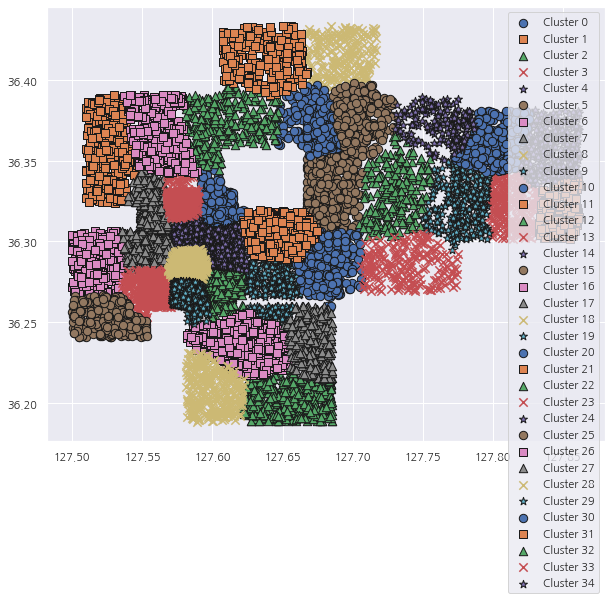

In [264]:
from sklearn.mixture import GaussianMixture

# 군집의 수 35개로 설정
gmm = GaussianMixture(n_components=35, random_state=0)
gmm_cluster_labels = gmm.fit_predict(ndf)

ndf["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, ndf, 'gmm_cluster',iscenter=False)

In [265]:
print('\n Gaussian Mixture Clustering _옥천군 전체')
print(ndf['gmm_cluster'].value_counts().sort_index())


 Gaussian Mixture Clustering _옥천군 전체
0     713
1     343
2     663
3     262
4     581
5     533
6     349
7     695
8     218
9     284
10    379
11    196
12    411
13    695
14    718
15    317
16    453
17    600
18    492
19    479
20    343
21    335
22    333
23    457
24    340
25    310
26    307
27    305
28    310
29    300
30    266
31    235
32    221
33    207
34    199
Name: gmm_cluster, dtype: int64


## 읍/면별로 GNN

### target1 옥천읍

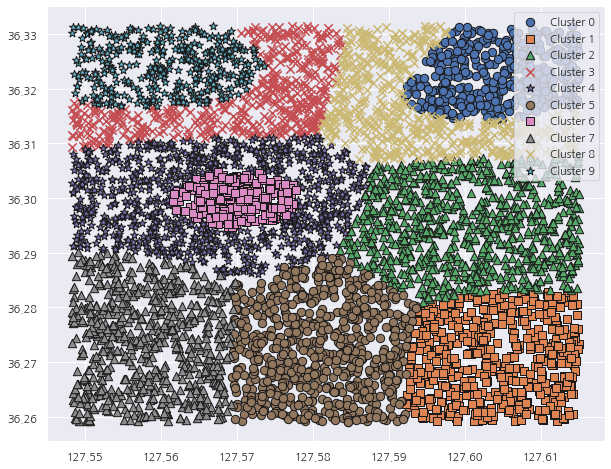


 Gaussian Mixture Clustering_target1 옥천읍
0    409
1    553
2    819
3    479
4    859
5    723
6    420
7    695
8    494
9    374
Name: gmm_cluster, dtype: int64


In [235]:
from sklearn.mixture import GaussianMixture

# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_cluster_labels1 = gmm.fit_predict(merged_df_옥천읍_target1)

merged_df_옥천읍_target1["gmm_cluster"] = gmm_cluster_labels1

visualize_cluster_plot(gmm, merged_df_옥천읍_target1, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target1 옥천읍')
print(merged_df_옥천읍_target1['gmm_cluster'].value_counts().sort_index())

### target2 이원면

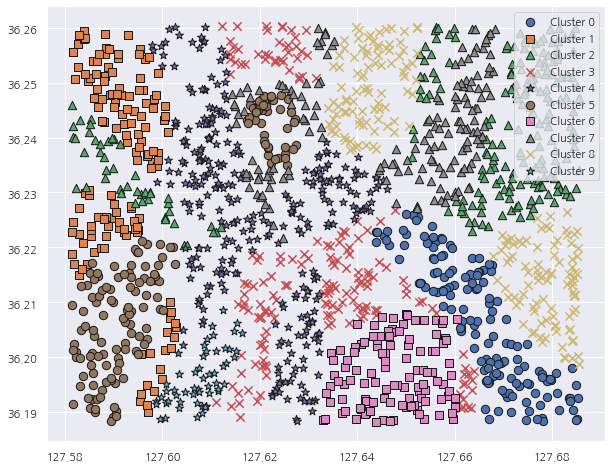


 Gaussian Mixture Clustering_target2 이원면
0    148
1    140
2    234
3    175
4    306
5    161
6    115
7    166
8    189
9     53
Name: gmm_cluster, dtype: int64


In [268]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_cluster_labels2 = gmm.fit_predict(merged_df_이원면_target2)

merged_df_이원면_target2["gmm_cluster"] = gmm_cluster_labels2

visualize_cluster_plot(gmm, merged_df_이원면_target2, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target2 이원면')
print(merged_df_이원면_target2['gmm_cluster'].value_counts().sort_index())

### target3 안내면

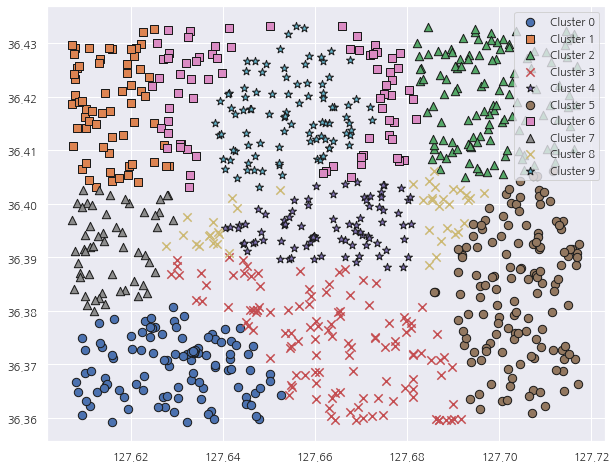


 Gaussian Mixture Clustering_target3 안내면
0    107
1     63
2    126
3    120
4     82
5    136
6     73
7     55
8     40
9     93
Name: gmm_cluster, dtype: int64


In [261]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_cluster_labels3 = gmm.fit_predict(merged_df_안내면_target3)

merged_df_안내면_target3["gmm_cluster"] = gmm_cluster_labels3

visualize_cluster_plot(gmm, merged_df_안내면_target3, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target3 안내면')
print(merged_df_안내면_target3['gmm_cluster'].value_counts().sort_index())

### target4 안남면

In [ ]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_cluster_labels4 = gmm.fit_predict(merged_df_안남면_target4)

merged_df_안남면_target4["gmm_cluster"] = gmm_cluster_labels4

visualize_cluster_plot(gmm, merged_df_안남면_target4, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target4 안남면')
print(merged_df_안남면_target4['gmm_cluster'].value_counts().sort_index())

### target5 군서면

In [ ]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_cluster_labels5 = gmm.fit_predict(merged_df_군서면_target5)

merged_df_군서면_target5["gmm_cluster"] = gmm_cluster_labels5

visualize_cluster_plot(gmm, merged_df_군서면_target5, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target5 군서면')
print(merged_df_군서면_target5['gmm_cluster'].value_counts().sort_index())

### target6 군북면
** x좌표 확인 필요, 아마 군집 수 조절해야 할 듯?

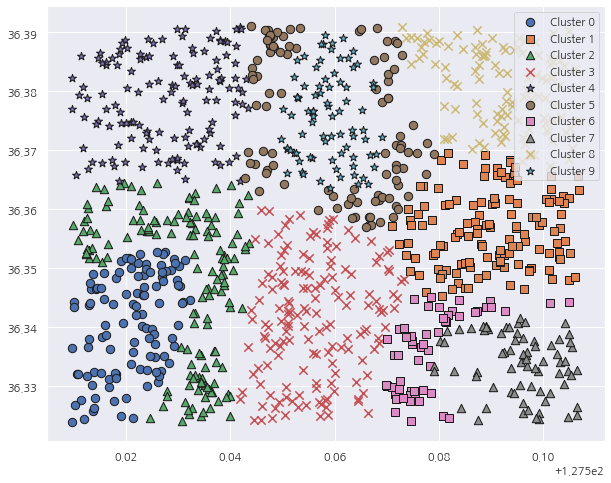


 Gaussian Mixture Clustering_target6 군북면
0    110
1    135
2    148
3    159
4    137
5     99
6     56
7     73
8    113
9     81
Name: gmm_cluster, dtype: int64


In [238]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_cluster_labels6 = gmm.fit_predict(merged_df_군북면_target6)

merged_df_군북면_target6["gmm_cluster"] = gmm_cluster_labels6

visualize_cluster_plot(gmm, merged_df_군북면_target6, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target6 군북면')
print(merged_df_군북면_target6['gmm_cluster'].value_counts().sort_index())

### target7 동이면

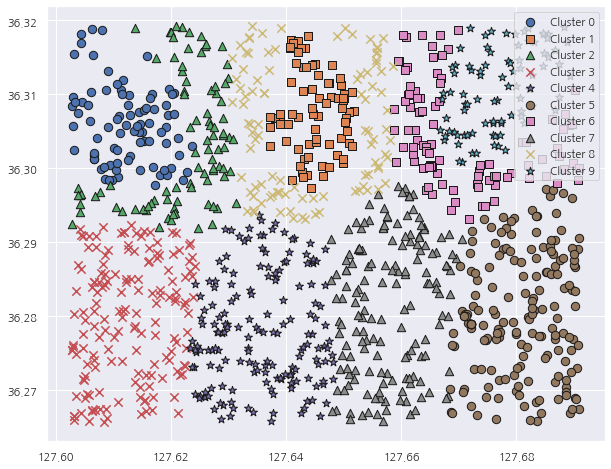


 Gaussian Mixture Clustering_target7 동이면
0     85
1     76
2     90
3    161
4    169
5    174
6     94
7    159
8     96
9     87
Name: gmm_cluster, dtype: int64


In [239]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_cluster_labels7 = gmm.fit_predict(merged_df_동이면_target7)

merged_df_동이면_target7["gmm_cluster"] = gmm_cluster_labels7

visualize_cluster_plot(gmm, merged_df_동이면_target7, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target7 동이면')
print(merged_df_동이면_target7['gmm_cluster'].value_counts().sort_index())

### target8 청산면

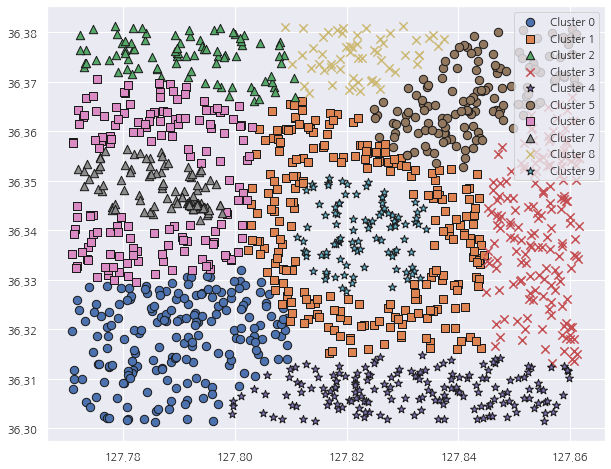


 Gaussian Mixture Clustering_target8 청산면
0    191
1    230
2     86
3    166
4    168
5    143
6    154
7    113
8     57
9     96
Name: gmm_cluster, dtype: int64


In [240]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_cluster_labels8 = gmm.fit_predict(merged_df_청산면_target8)

merged_df_청산면_target8["gmm_cluster"] = gmm_cluster_labels8

visualize_cluster_plot(gmm, merged_df_청산면_target8, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target8 청산면')
print(merged_df_청산면_target8['gmm_cluster'].value_counts().sort_index())

### target9 청성면

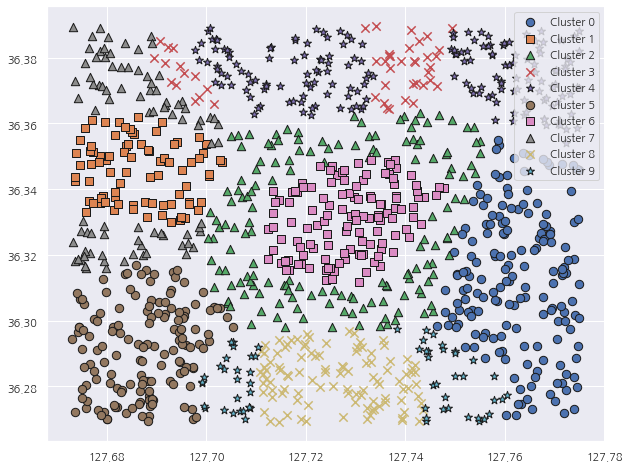


 Gaussian Mixture Clustering_target9 청성면
0    171
1     82
2    154
3     47
4    180
5    146
6    126
7     88
8    104
9     59
Name: gmm_cluster, dtype: int64


In [241]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_cluster_labels9 = gmm.fit_predict(merged_df_청성면_target9)

merged_df_청성면_target9["gmm_cluster"] = gmm_cluster_labels9

visualize_cluster_plot(gmm, merged_df_청성면_target9, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target9 청성면')
print(merged_df_청성면_target9['gmm_cluster'].value_counts().sort_index())

# 실루엣 계수

In [242]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

### 1. 옥천읍

In [243]:
merged_df_옥천읍_target1['gmm_silhouette'] = silhouette_samples(X=merged_df_옥천읍_target1[['Latitude', 'Longitude']], labels=merged_df_옥천읍_target1['gmm_cluster'])

gmm옥천읍_silhouette = silhouette_score(X=merged_df_옥천읍_target1[['Latitude', 'Longitude']], labels=merged_df_옥천읍_target1['gmm_cluster'])

print('gnn')
print('\n옥천읍_실루엣 계수:')
print(merged_df_옥천읍_target1.gmm_silhouette)
print('\n옥천읍 data의 실루엣 계수(평균):')
print(gmm옥천읍_silhouette)

gnn

옥천읍_실루엣 계수:
0       0.185555
1       0.140405
2       0.616405
3      -0.115599
4       0.679142
          ...   
5820    0.689645
5821   -0.342140
5822    0.712037
5823    0.550015
5824   -0.230704
Name: gmm_silhouette, Length: 5825, dtype: float64

옥천읍 data의 실루엣 계수(평균):
0.245015110510569


### 2. 이원면

In [269]:
merged_df_이원면_target2['gmm_silhouette'] = silhouette_samples(X=merged_df_이원면_target2[['Latitude', 'Longitude']], labels=merged_df_이원면_target2['gmm_cluster'])

gmm이원면_silhouette = silhouette_score(X=merged_df_이원면_target2[['Latitude', 'Longitude']], labels=merged_df_이원면_target2['gmm_cluster'])

print('gnn')
print('\n이원면_실루엣 계수:')
print(merged_df_이원면_target2.gmm_silhouette)
print('\n이원면 data의 실루엣 계수(평균):')
print(gmm이원면_silhouette)

gnn

이원면_실루엣 계수:
0      -0.511373
1      -0.436152
2       0.128865
3       0.358747
4       0.128267
          ...   
1682   -0.260110
1683   -0.262936
1684   -0.268659
1685   -0.172880
1686   -0.268147
Name: gmm_silhouette, Length: 1687, dtype: float64

이원면 data의 실루엣 계수(평균):
-0.005085907532826378


### 3. 안내면

In [245]:
merged_df_안내면_target3['gmm_silhouette'] = silhouette_samples(X=merged_df_안내면_target3[['Latitude', 'Longitude']], labels=merged_df_안내면_target3['gmm_cluster'])

gmm안내면_silhouette = silhouette_score(X=merged_df_안내면_target3[['Latitude', 'Longitude']], labels=merged_df_안내면_target3['gmm_cluster'])

print('dbscan')
print('\n안내면_실루엣 계수:')
print(merged_df_안내면_target3.gmm_silhouette)
print('\n안내면 data의 실루엣 계수(평균):')
print(gmm안내면_silhouette)

dbscan

안내면_실루엣 계수:
0      0.305415
1      0.545282
2      0.600592
3      0.533523
4      0.317875
         ...   
890    0.544935
891    0.569077
892    0.568880
893    0.539508
894    0.547576
Name: gmm_silhouette, Length: 895, dtype: float64

안내면 data의 실루엣 계수(평균):
0.2962288239386648


### 4. 안남면

In [246]:
merged_df_안남면_target4['gmm_silhouette'] = silhouette_samples(X=merged_df_안남면_target4[['Latitude', 'Longitude']], labels=merged_df_안남면_target4['gmm_cluster'])

gmm안남면_silhouette = silhouette_score(X=merged_df_안남면_target4[['Latitude', 'Longitude']], labels=merged_df_안남면_target4['gmm_cluster'])

print('dbscan')
print('\n안남면_실루엣 계수:')
print(merged_df_안남면_target4.gmm_silhouette)
print('\n안남면 data의 실루엣 계수(평균):')
print(gmm안남면_silhouette)

dbscan

안남면_실루엣 계수:
0      0.518232
1      0.521893
2      0.397972
3      0.204343
4      0.357795
         ...   
599    0.024496
600    0.370625
601    0.267514
602    0.098267
603    0.323835
Name: gmm_silhouette, Length: 604, dtype: float64

안남면 data의 실루엣 계수(평균):
0.2765327878943478


### 5. 군서면

In [247]:
merged_df_군서면_target5['gmm_silhouette'] = silhouette_samples(X=merged_df_군서면_target5[['Latitude', 'Longitude']], labels=merged_df_군서면_target5['gmm_cluster'])

gmm군서면_silhouette = silhouette_score(X=merged_df_군서면_target5[['Latitude', 'Longitude']], labels=merged_df_군서면_target5['gmm_cluster'])

print('gnn')
print('\n군서면_실루엣 계수:')
print(merged_df_군서면_target5.gmm_silhouette)
print('\n군서면 data의 실루엣 계수(평균):')
print(gmm군서면_silhouette)

gnn

군서면_실루엣 계수:
0      0.081262
1      0.516770
2      0.606891
3      0.162330
4      0.583537
         ...   
936    0.707625
937    0.724711
938   -0.345590
939    0.242197
940    0.284262
Name: gmm_silhouette, Length: 941, dtype: float64

군서면 data의 실루엣 계수(평균):
0.2729591171224994


### 6. 군북면

In [248]:
merged_df_군북면_target6['gmm_silhouette'] = silhouette_samples(X=merged_df_군북면_target6[['Latitude', 'Longitude']], labels=merged_df_군북면_target6['gmm_cluster'])

gmm군북면_silhouette = silhouette_score(X=merged_df_군북면_target6[['Latitude', 'Longitude']], labels=merged_df_군북면_target6['gmm_cluster'])

print('gnn')
print('\n군북면_실루엣 계수:')
print(merged_df_군북면_target6.gmm_silhouette)
print('\n군북면 data의 실루엣 계수(평균):')
print(gmm군북면_silhouette)

gnn

군북면_실루엣 계수:
0       0.273302
1       0.427121
2      -0.188158
3       0.378901
4       0.570561
          ...   
1106    0.313628
1107    0.066045
1108    0.512996
1109   -0.049216
1110    0.322122
Name: gmm_silhouette, Length: 1111, dtype: float64

군북면 data의 실루엣 계수(평균):
0.25795080198100284


### 7. 동이면

In [249]:
merged_df_동이면_target7['gmm_silhouette'] = silhouette_samples(X=merged_df_동이면_target7[['Latitude', 'Longitude']], labels=merged_df_동이면_target7['gmm_cluster'])

gmm동이면_silhouette = silhouette_score(X=merged_df_동이면_target7[['Latitude', 'Longitude']], labels=merged_df_동이면_target7['gmm_cluster'])

print('dbscan')
print('\n동이면_실루엣 계수:')
print(merged_df_동이면_target7.gmm_silhouette)
print('\n동이면 data의 실루엣 계수(평균):')
print(gmm동이면_silhouette)

dbscan

동이면_실루엣 계수:
0       0.399733
1       0.276178
2      -0.275912
3      -0.086880
4      -0.052324
          ...   
1186   -0.068870
1187    0.288687
1188    0.288687
1189    0.288687
1190    0.288687
Name: gmm_silhouette, Length: 1191, dtype: float64

동이면 data의 실루엣 계수(평균):
0.26119932399200746


### 8. 청산면

In [250]:
merged_df_청산면_target8['gmm_silhouette'] = silhouette_samples(X=merged_df_청산면_target8[['Latitude', 'Longitude']], labels=merged_df_청산면_target8['gmm_cluster'])

gmm청산면_silhouette = silhouette_score(X=merged_df_청산면_target8[['Latitude', 'Longitude']], labels=merged_df_청산면_target8['gmm_cluster'])

print('dbscan')
print('\n청산면_실루엣 계수:')
print(merged_df_청산면_target8.gmm_silhouette)
print('\n청산면 data의 실루엣 계수(평균):')
print(gmm청산면_silhouette)

dbscan

청산면_실루엣 계수:
0       0.340486
1       0.475673
2       0.530171
3       0.475187
4      -0.256164
          ...   
1399    0.584746
1400    0.551686
1401    0.573186
1402    0.590978
1403    0.580919
Name: gmm_silhouette, Length: 1404, dtype: float64

청산면 data의 실루엣 계수(평균):
0.220967493277935


### 9. 청성면

In [251]:
merged_df_청성면_target9['gmm_silhouette'] = silhouette_samples(X=merged_df_청성면_target9[['Latitude', 'Longitude']], labels=merged_df_청성면_target9['gmm_cluster'])

gmm청성면_silhouette = silhouette_score(X=merged_df_청성면_target9[['Latitude', 'Longitude']], labels=merged_df_청성면_target9['gmm_cluster'])

print('dbscan')
print('\n청성면_실루엣 계수:')
print(merged_df_청성면_target9.gmm_silhouette)
print('\n청성면 data의 실루엣 계수(평균):')
print(gmm청성면_silhouette)

dbscan

청성면_실루엣 계수:
0       0.406140
1       0.031662
2      -0.201497
3      -0.255873
4       0.557666
          ...   
1152    0.536020
1153    0.183984
1154    0.263573
1155    0.483032
1156    0.138670
Name: gmm_silhouette, Length: 1157, dtype: float64

청성면 data의 실루엣 계수(평균):
0.15836218228428955


# 실루엣계수 시각화

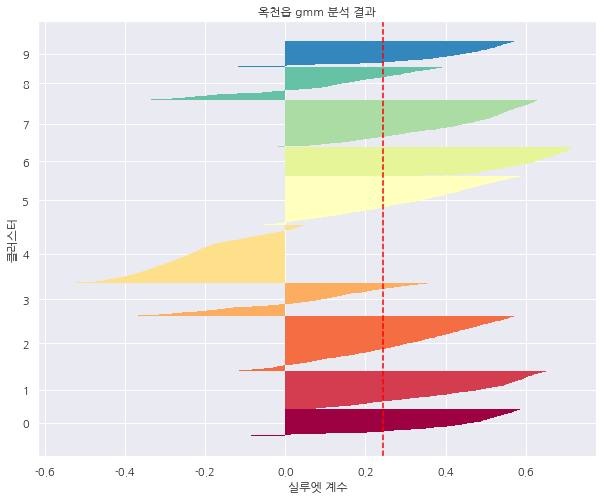

In [252]:
gnn_silhouette_sample = merged_df_옥천읍_target1['gmm_silhouette']
labels = gmm_cluster_labels1

# 각 data의 실루엣 계수를 막대 그래프로 시각화합
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_values = np.array(gnn_silhouette_sample[labels == cluster])
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.get_cmap("Spectral")(i / len(np.unique(labels)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0,
             edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_values)

# 각 data의 실루엣 계수의 평균값을 수직선으로 그림
silhouette_avg = np.mean(gnn_silhouette_sample)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# 축과 레이블 설정
plt.yticks(y_ticks, np.unique(labels))
plt.rc('font', family='NanumGothic')
plt.ylabel('클러스터')
plt.xlabel('실루엣 계수')
plt.title('옥천읍 gmm 분석 결과')

plt.rc('font', size=20)    

plt.show()

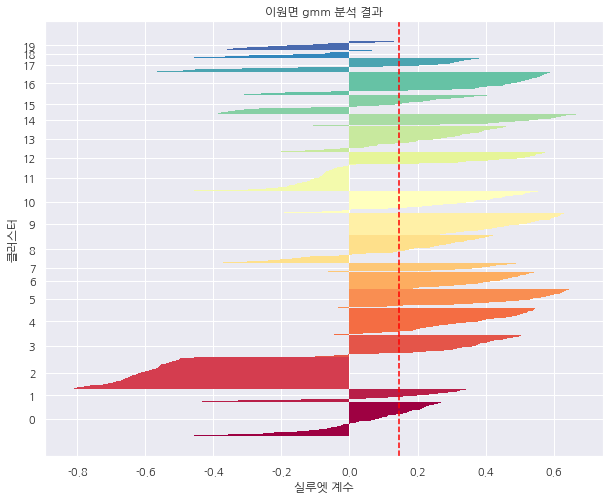

In [253]:
gnn_silhouette_sample = merged_df_이원면_target2['gmm_silhouette']
labels = gmm_cluster_labels2

# 각 data의 실루엣 계수를 막대 그래프로 시각화합
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_values = np.array(gnn_silhouette_sample[labels == cluster])
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.get_cmap("Spectral")(i / len(np.unique(labels)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0,
             edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_values)

# 각 data의 실루엣 계수의 평균값을 수직선으로 그림
silhouette_avg = np.mean(gnn_silhouette_sample)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# 축과 레이블 설정
plt.yticks(y_ticks, np.unique(labels))
plt.rc('font', family='NanumGothic')
plt.ylabel('클러스터')
plt.xlabel('실루엣 계수')
plt.title('이원면 gmm 분석 결과')

plt.rc('font', size=20)    

plt.show()

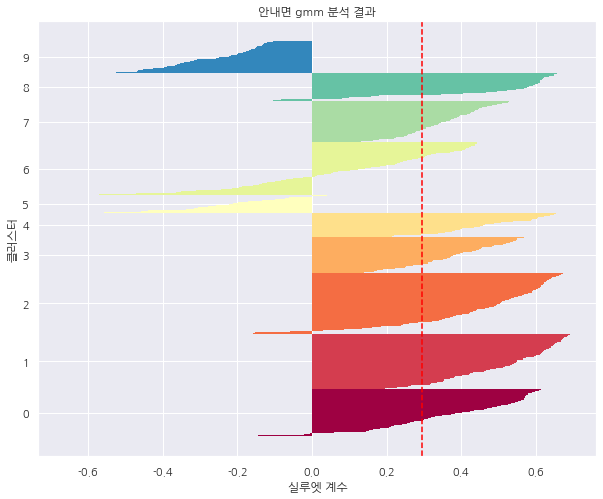

In [254]:
gnn_silhouette_sample = merged_df_안내면_target3['gmm_silhouette']
labels = gmm_cluster_labels3

# 각 data의 실루엣 계수를 막대 그래프로 시각화합
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_values = np.array(gnn_silhouette_sample[labels == cluster])
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.get_cmap("Spectral")(i / len(np.unique(labels)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0,
             edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_values)

# 각 data의 실루엣 계수의 평균값을 수직선으로 그림
silhouette_avg = np.mean(gnn_silhouette_sample)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# 축과 레이블 설정
plt.yticks(y_ticks, np.unique(labels))
plt.rc('font', family='NanumGothic')
plt.ylabel('클러스터')
plt.xlabel('실루엣 계수')
plt.title('안내면 gmm 분석 결과')

plt.rc('font', size=20)    

plt.show()

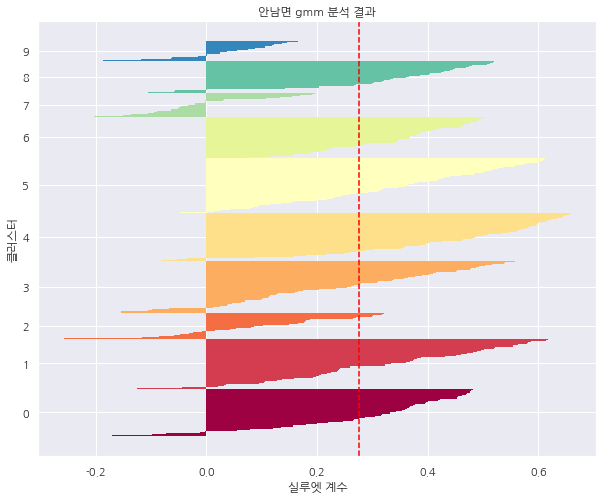

In [255]:
gnn_silhouette_sample = merged_df_안남면_target4['gmm_silhouette']
labels = gmm_cluster_labels4

# 각 data의 실루엣 계수를 막대 그래프로 시각화합
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_values = np.array(gnn_silhouette_sample[labels == cluster])
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.get_cmap("Spectral")(i / len(np.unique(labels)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0,
             edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_values)

# 각 data의 실루엣 계수의 평균값을 수직선으로 그림
silhouette_avg = np.mean(gnn_silhouette_sample)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# 축과 레이블 설정
plt.yticks(y_ticks, np.unique(labels))
plt.rc('font', family='NanumGothic')
plt.ylabel('클러스터')
plt.xlabel('실루엣 계수')
plt.title('안남면 gmm 분석 결과')

plt.rc('font', size=20)    

plt.show()

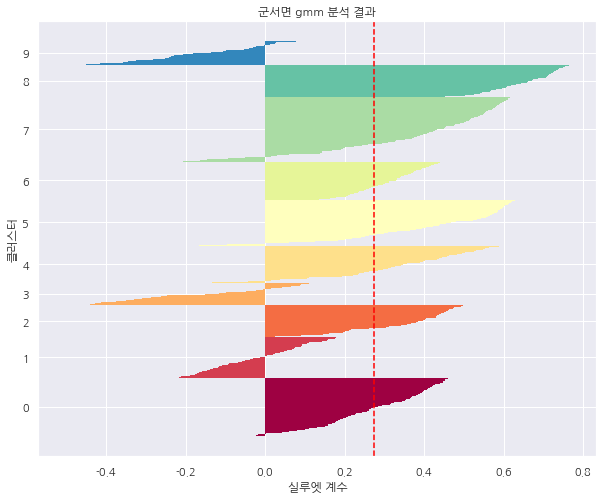

In [256]:
gnn_silhouette_sample = merged_df_군서면_target5['gmm_silhouette']
labels = gmm_cluster_labels5

# 각 data의 실루엣 계수를 막대 그래프로 시각화합
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_values = np.array(gnn_silhouette_sample[labels == cluster])
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.get_cmap("Spectral")(i / len(np.unique(labels)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0,
             edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_values)

# 각 data의 실루엣 계수의 평균값을 수직선으로 그림
silhouette_avg = np.mean(gnn_silhouette_sample)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# 축과 레이블 설정
plt.yticks(y_ticks, np.unique(labels))
plt.rc('font', family='NanumGothic')
plt.ylabel('클러스터')
plt.xlabel('실루엣 계수')
plt.title('군서면 gmm 분석 결과')

plt.rc('font', size=20)    

plt.show()

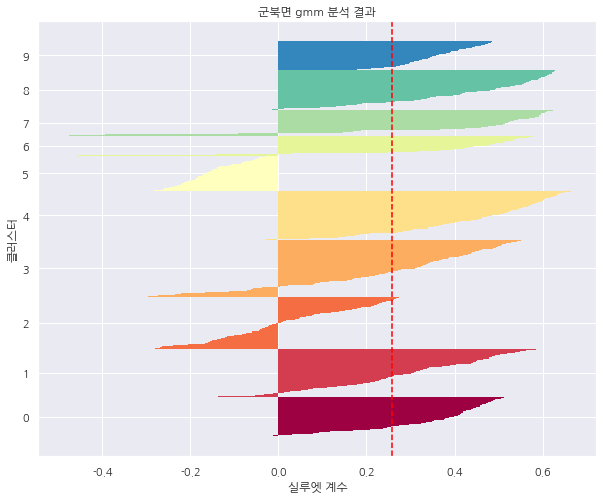

In [257]:
gnn_silhouette_sample = merged_df_군북면_target6['gmm_silhouette']
labels = gmm_cluster_labels6

# 각 data의 실루엣 계수를 막대 그래프로 시각화합
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_values = np.array(gnn_silhouette_sample[labels == cluster])
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.get_cmap("Spectral")(i / len(np.unique(labels)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0,
             edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_values)

# 각 data의 실루엣 계수의 평균값을 수직선으로 그림
silhouette_avg = np.mean(gnn_silhouette_sample)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# 축과 레이블 설정
plt.yticks(y_ticks, np.unique(labels))
plt.rc('font', family='NanumGothic')
plt.ylabel('클러스터')
plt.xlabel('실루엣 계수')
plt.title('군북면 gmm 분석 결과')

plt.rc('font', size=20)    

plt.show()

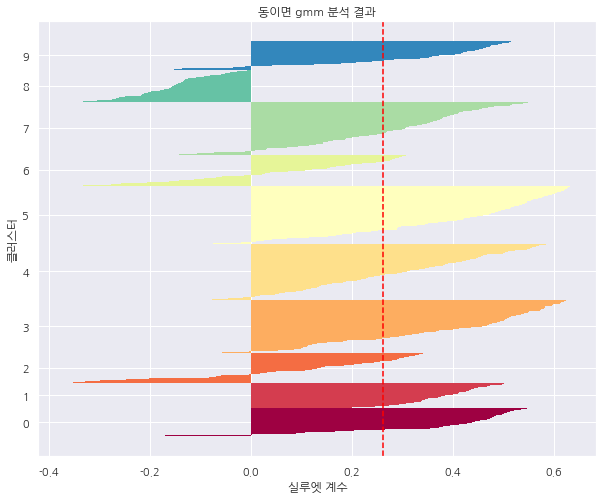

In [258]:
gnn_silhouette_sample = merged_df_동이면_target7['gmm_silhouette']
labels = gmm_cluster_labels7

# 각 data의 실루엣 계수를 막대 그래프로 시각화합
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_values = np.array(gnn_silhouette_sample[labels == cluster])
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.get_cmap("Spectral")(i / len(np.unique(labels)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0,
             edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_values)

# 각 data의 실루엣 계수의 평균값을 수직선으로 그림
silhouette_avg = np.mean(gnn_silhouette_sample)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# 축과 레이블 설정
plt.yticks(y_ticks, np.unique(labels))
plt.rc('font', family='NanumGothic')
plt.ylabel('클러스터')
plt.xlabel('실루엣 계수')
plt.title('동이면 gmm 분석 결과')

plt.rc('font', size=20)    

plt.show()

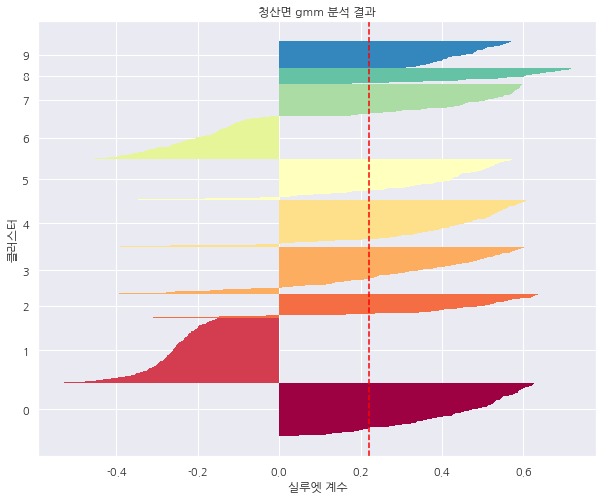

In [259]:
gnn_silhouette_sample = merged_df_청산면_target8['gmm_silhouette']
labels = gmm_cluster_labels8

# 각 data의 실루엣 계수를 막대 그래프로 시각화합
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_values = np.array(gnn_silhouette_sample[labels == cluster])
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.get_cmap("Spectral")(i / len(np.unique(labels)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0,
             edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_values)

# 각 data의 실루엣 계수의 평균값을 수직선으로 그림
silhouette_avg = np.mean(gnn_silhouette_sample)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# 축과 레이블 설정
plt.yticks(y_ticks, np.unique(labels))
plt.rc('font', family='NanumGothic')
plt.ylabel('클러스터')
plt.xlabel('실루엣 계수')
plt.title('청산면 gmm 분석 결과')

plt.rc('font', size=20)    

plt.show()

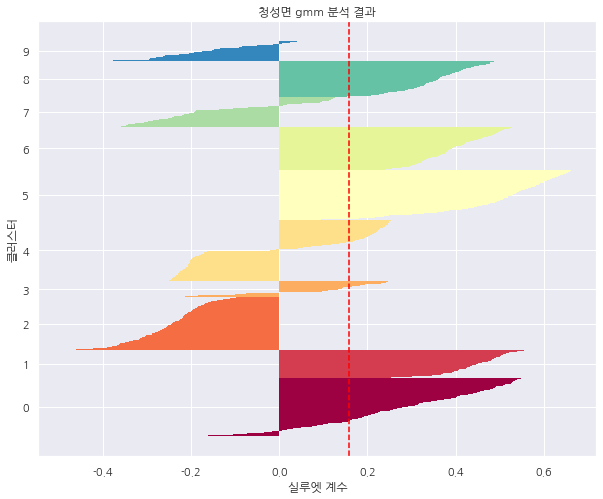

In [260]:
gnn_silhouette_sample = merged_df_청성면_target9['gmm_silhouette']
labels = gmm_cluster_labels9

# 각 data의 실루엣 계수를 막대 그래프로 시각화합
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_values = np.array(gnn_silhouette_sample[labels == cluster])
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.get_cmap("Spectral")(i / len(np.unique(labels)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0,
             edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_values)

# 각 data의 실루엣 계수의 평균값을 수직선으로 그림
silhouette_avg = np.mean(gnn_silhouette_sample)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# 축과 레이블 설정
plt.yticks(y_ticks, np.unique(labels))
plt.rc('font', family='NanumGothic')
plt.ylabel('클러스터')
plt.xlabel('실루엣 계수')
plt.title('청성면 gmm 분석 결과')

plt.rc('font', size=20)    

plt.show()